In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 1. Введение в анализ и прогнозирование временных рядов

## § 1.1. Типы экономических прогнозов

Прогнозы:
- *поисковые*. Что вероятнее всего ожидать в будущем?
- *нормативные*. Каким образом нужно изменить условия, чтобы достичь заданного состояния прогнозируемого объекта?

&nbsp;

По времени:
- *оперативные*. До 1 месяца
- *краткосрочные*. 1-12 месяцев
- *среднесрочные*. от 1 года, но не больше 5 лет
- *долгосрочные*. Более 5 лет

&nbsp;

Временные ряды:
 - *моментные*. В качестве показателя времени указываются отдельные моменты времени (даты)
 - *интервальные*. В качестве показателя времени указываются сутки, месяцы, кварталы, полугодия и тд
 
&nbsp;

Уровни временного ряда (отдельные наблюдения):
- *абсолютные*
- *относительные*
- *средние*

&nbsp;

Интервальные ряды с абсолютными величинами можно суммировать (св-во аддитивности).\
В моментном ряде имеет смысл  расчет разностей уровней, харак-щих изменения показателя за некоторый отрезок времени.

&nbsp;

"*Смыкание рядов динамики*" - приведение уровней динамики к сопоставиму виду.

## § 1.2. Основные аналитические характеристики динамики и их использование при прогнозировании

Основные аналитические показатели:
<table>
    <thead>
        <tr>
            <th></th>
            <th>Абсолютные приросты</th>
            <th>Темпы роста</th>
            <th>Темпы прироста</th>
        </tr>
    </thead>
    <tr>
        <th>Цепной</th>
        <td>
            $$
            \normalsize\Delta y_t = y_t - y_{t-1}
            $$
        </td>
        <td>
            $$
            \normalsize T_t = \frac{y_t}{y_{t-1}}100\%
            $$
        </td>
        <td>
            $$
            \normalsize K_t = T_t - 100\%
            $$
        </td>
    </tr>
    <tr>
        <th>Базисный</th>
        <td>
            $$
            \normalsize\Delta y_t^b = y_t - y_b
            $$
        </td>
        <td>
            $$
            \normalsize T_t^b = \frac{y_t}{y_b}100\%
            $$
        </td>
        <td>
            $$
            \normalsize K_t^b = T_t^b - 100\%
            $$
        </td>
    </tr>
    <tr>
        <th>Средний</th>
        <td>
            $$
            \normalsize \overline{\Delta y} = \frac{y_n - y_1}{n - 1}
            $$
        </td>
        <td>
            $$
            \normalsize \overline{T} = \sqrt[n-1]\frac{y_n}{y_1}100\%
            $$
        </td>
        <td>
            $$
            \normalsize \overline{K} = \overline{K} - 100\%
            $$
        </td>
    </tr>
</table>

$\normalsize y_t$ - текущий уровень временного ряда

$\normalsize\Delta y_b$ - уровень временного ряда принятый за базу сравнения

$\normalsize n$ - длина временного ряда

Описание динамики ряда с помощью среднего абсолютного прироста соответствует  его представлению в виде прямой, проведенной через две крайние точки. В этом случае, чтобы получить прогноз на L шагов вперед:
$$
\normalsize \hat{y}_{n+L} = y_n + L\overline{\Delta y}
$$

$\normalsize y_n$ - значение в последней n-й точке ряда

$\normalsize\hat{y}_{n+L}$ -прогнозная оценка значения (n + L)-го уровня

$\normalsize \overline{\Delta y}$ - значение среднего абсолютного прироста

Очевидно, что такой подход к  получению прогнозного значения корректен, если хар-р развития близок к **линейному**

In [25]:
df = pd.DataFrame(
    index=pd.date_range(start='2020', end='2025', freq='Y'),
    columns=['volume'],
    data=np.array([26., 28.5, 32.4, 35.3, 37.7])
)
df

,volume
2020-12-31,26.0
2021-12-31,28.5
2022-12-31,32.4
2023-12-31,35.3
2024-12-31,37.7


In [26]:
df['Period-to-period absolute change'] = df['volume'].diff() # цепной абсолютный прирост
df

,volume,Period-to-period absolute change
2020-12-31,26.0,NaN
2021-12-31,28.5,2.5
2022-12-31,32.4,3.9
2023-12-31,35.3,2.9
2024-12-31,37.7,2.4


In [36]:
# средний абсолютный прирост
mean_abs_change = np.round((df['volume'].iloc[-1]-df['volume'].iloc[0])/(df.shape[0]-1), 1)
mean_abs_change

2.9

In [37]:
# прогноз
forecast = df['volume'].iloc[-1] + mean_abs_change
forecast

40.6

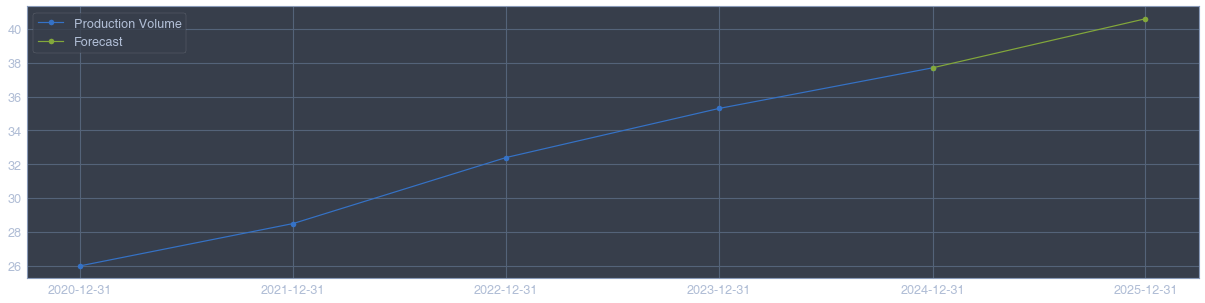

In [56]:
fig, ax = plt.subplots(1, figsize=(21, 5))

ax.plot(df['volume'].index, df['volume'].to_list(), marker='o', label='Production Volume')
ax.plot(pd.date_range(start='2024', end='2026', freq='Y'),
        [df['volume'].iloc[-1], forecast], marker='o', label='Forecast')
ax.set_xticks(pd.date_range(start='2020', end='2026', freq='Y'))
ax.legend()

In [69]:
df_2022 = pd.read_excel('data/Nedel_ipc.xlsx', sheet_name='2022', skiprows=3)
df_2022.dropna(axis=0, inplace=True)
df_2022.head()

,Наименование,на 10 января **,на 14 января,на 21 января,на 28 января,на 4 февраля,на 11 февраля,на 18 февраля,на 25 февраля,на 4 марта,...,на 24 октября,на 31 октября,на 7 ноября,на 14 ноября,на 21 ноября,на 28 ноября,на 5 декабря,на 12 декабря,на 19 декабря,26 декабря
0,"Говядина (кроме бескостного мяса), кг",100.58,100.25,100.25,100.33,100.58,100.21,100.34,100.39,100.96,...,100.12,100.09,99.99,100.23,100.03,100.09,100,100.06,100.2,100.26
1,"Свинина (кроме бескостного мяса), кг",99.85,99.73,99.97,100.18,99.58,99.75,99.81,99.78,100.22,...,99.78,100.1,99.92,99.69,99.79,100.32,99.91,100.03,99.76,100.12
2,"Баранина (кроме бескостного мяса), кг",100.25,100.04,100.42,100.32,99.93,100.2,100.36,100.22,100.22,...,99.94,99.84,100.02,99.98,100.17,100.03,100.02,100.39,100.06,99.83
3,"Куры охлажденные и мороженые, кг",99.88,99.58,99.45,99.74,99.73,99.78,99.94,99.82,99.94,...,100.15,99.96,99.88,99.61,99.82,99.64,99.76,99.57,99.63,100.27
4,"Сосиски, сардельки, кг",100.28,99.83,100.47,100.17,99.98,99.75,100.56,100.16,100.16,...,100.2,100.16,100.18,99.67,99.79,100.37,100.36,99.9,99.97,100.33
